In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')
voices = pd.read_csv('voice.csv')
Gender_mapping = {'male':0, 'female':1}
voices = voices.replace({'label':Gender_mapping})
print(voices.shape)
print(voices.head())

(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812 

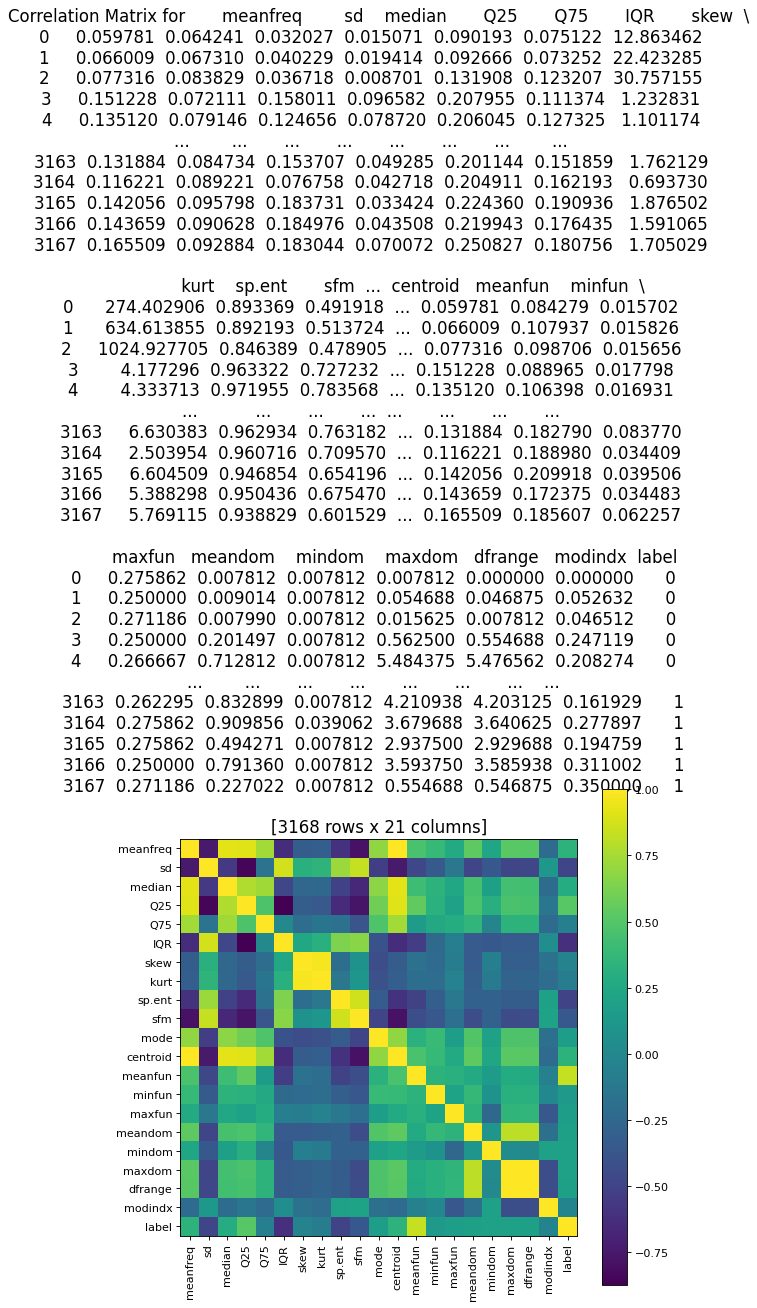

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
  
plotCorrelationMatrix(voices, 8)

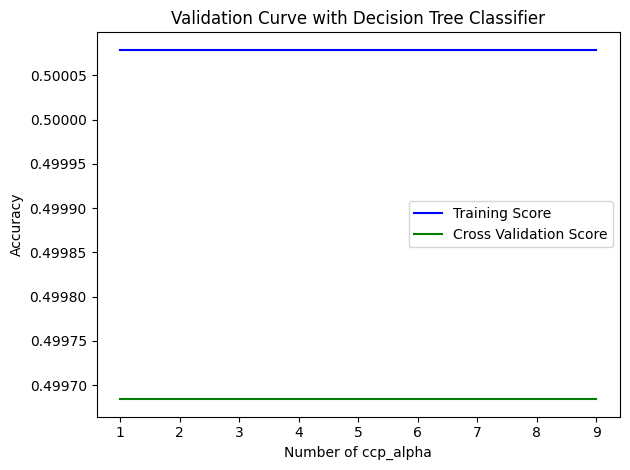

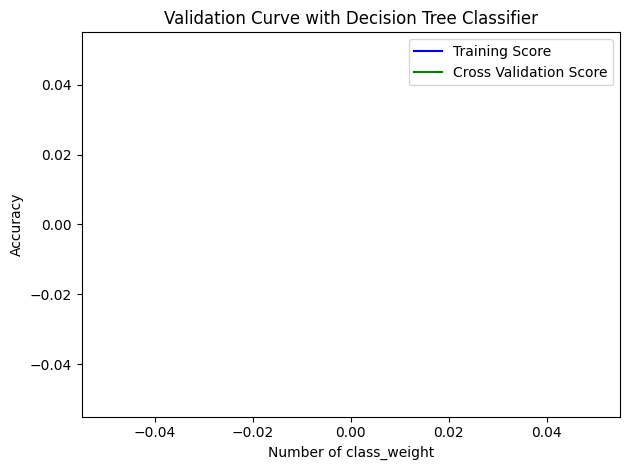

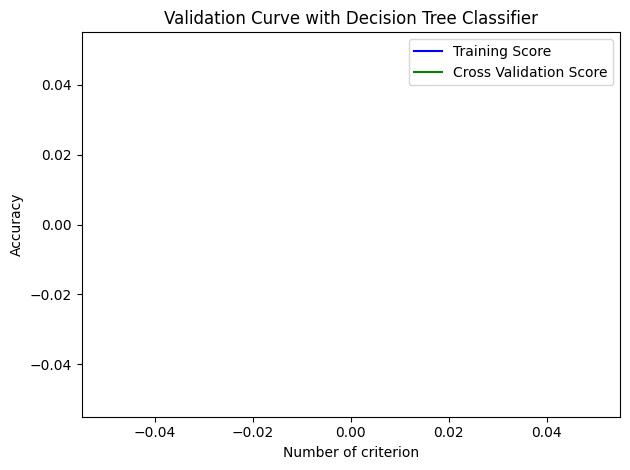

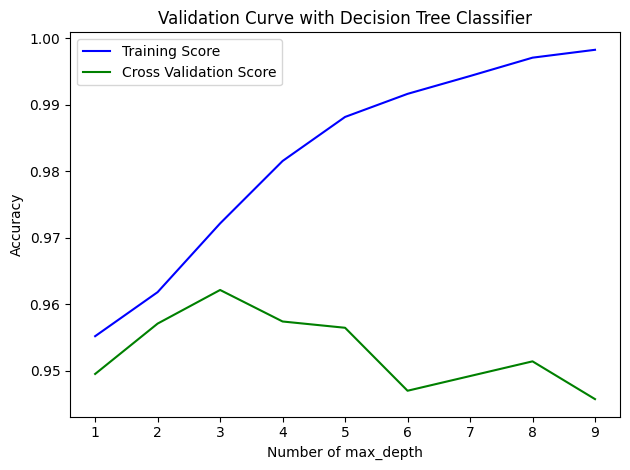

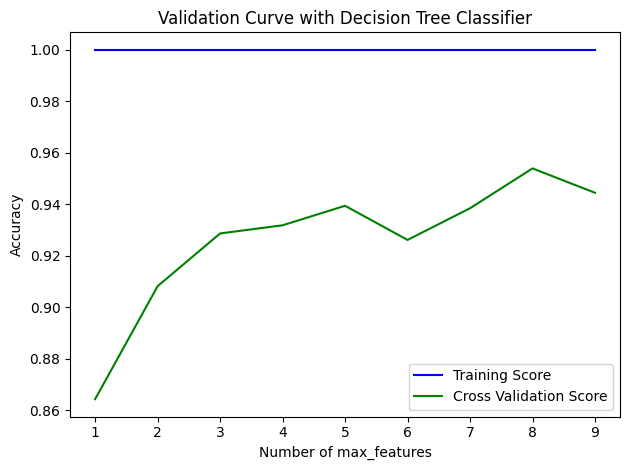

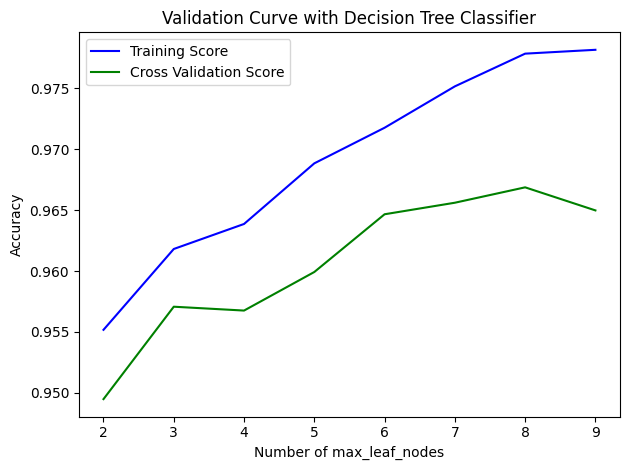

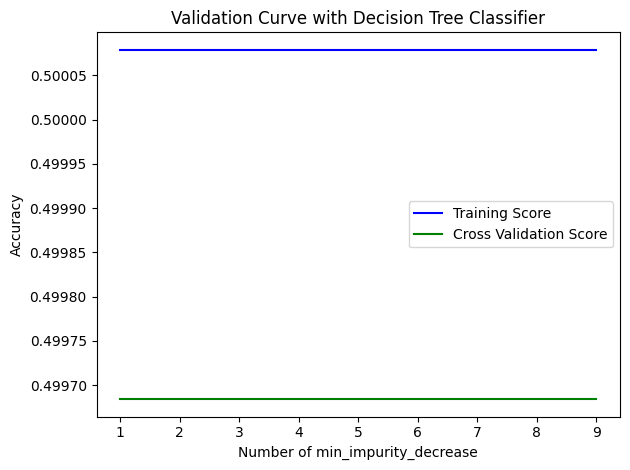

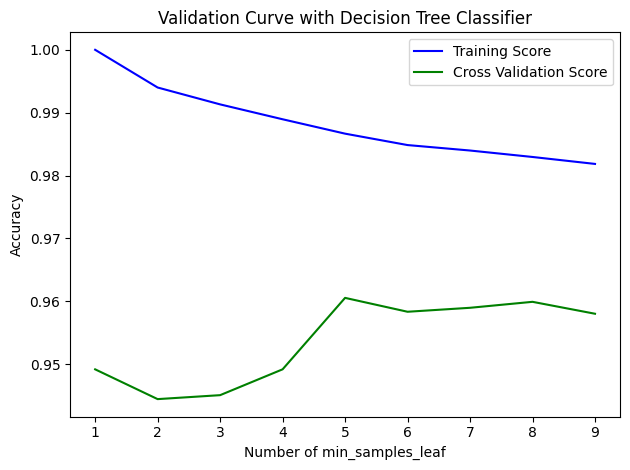

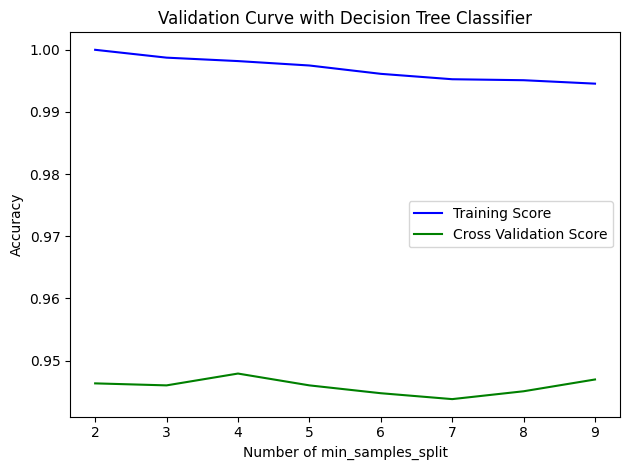

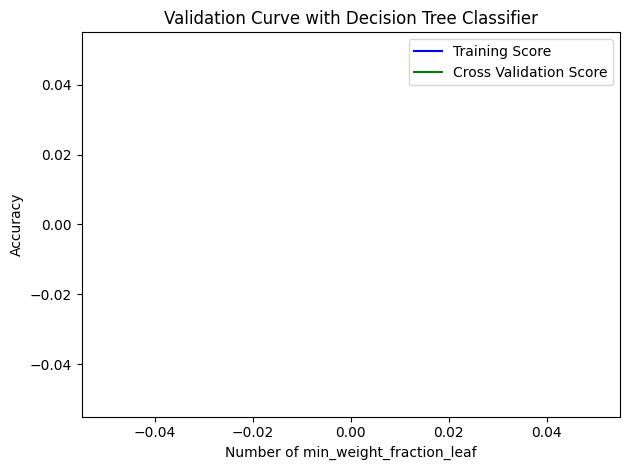

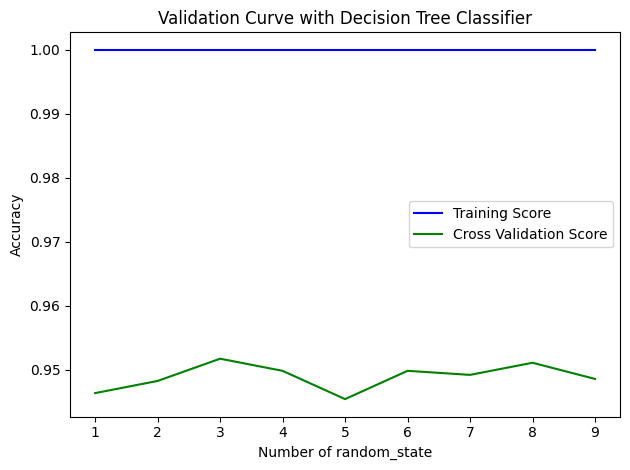

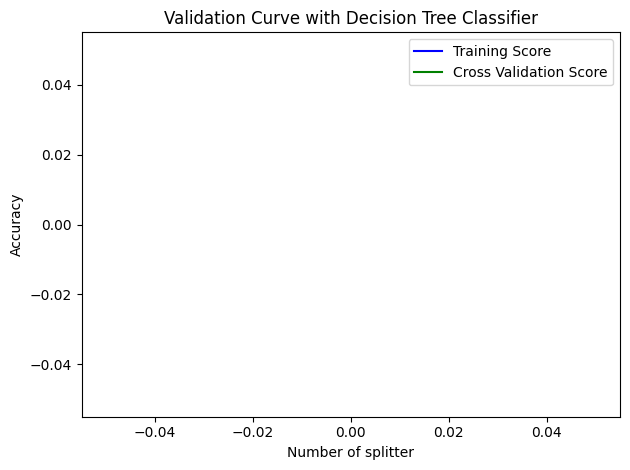

In [4]:
# X contains the data and y contains the labels
X = voices.drop(['label'],axis=1)
y = voices['label']
param = ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease','min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
for x in param:
  # Setting the range for the parameter (from 1 to 10)
  parameter_range = np.arange(1, 10, 1)
  
  # Calculate accuracy on training and test set using the
  # gamma parameter with 5-fold cross validation
  #features = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minifun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
  train_score, test_score = validation_curve(DecisionTreeClassifier(), X, y,param_name = x,param_range = parameter_range,cv = 5, scoring = "accuracy")


  # Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
  
  # Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
  
  # Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
      label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
    label = "Cross Validation Score", color = 'g')
  
  # Creating the plot
  plt.title("Validation Curve with Decision Tree Classifier")
  plt.xlabel("Number of "+x)
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

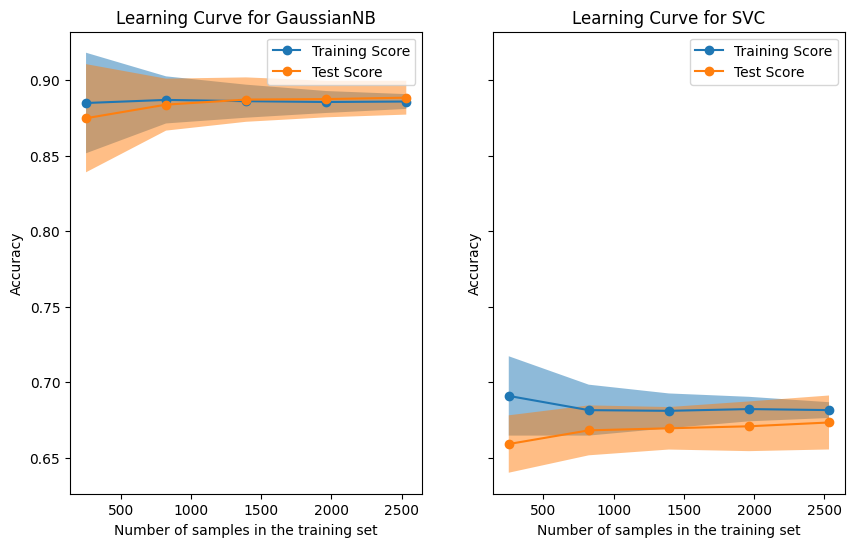

In [5]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = voices.drop(['label'],axis=1)
y = voices['label']

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")



In [6]:
from sklearn.model_selection import learning_curve

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    naive_bayes, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    svc, **common_params
)

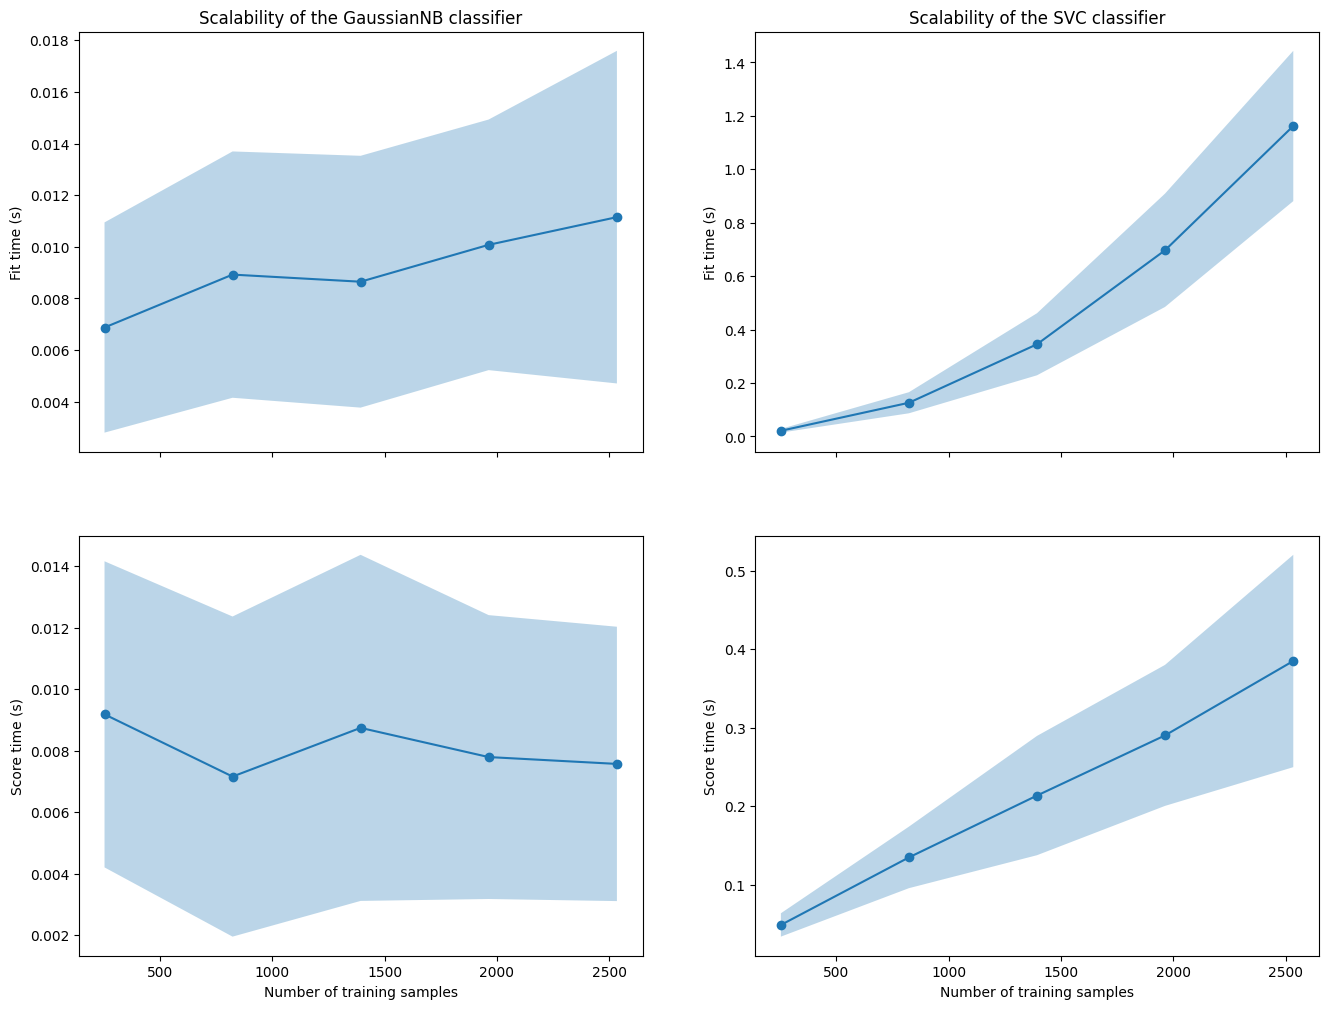

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [score_times_nb, score_times_svm],
        [naive_bayes, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

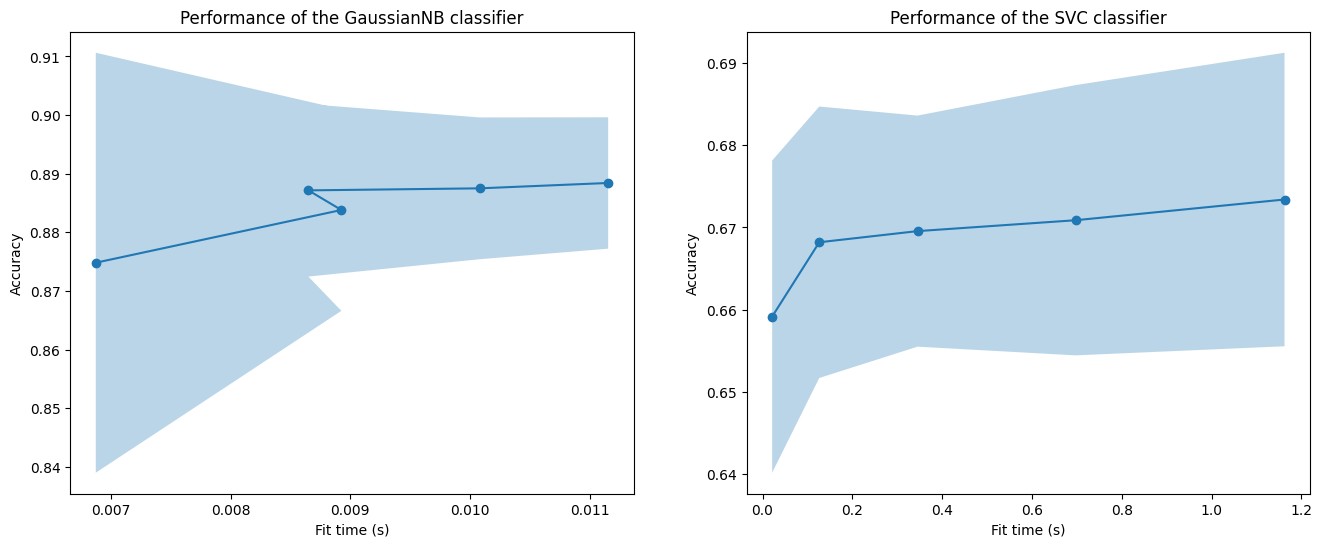

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for ax_idx, (fit_times, test_scores, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [test_scores_nb, test_scores_svm],
        [naive_bayes, svc],
    )
):
    ax[ax_idx].plot(fit_times.mean(axis=1), test_scores.mean(axis=1), "o-")
    ax[ax_idx].fill_between(
        fit_times.mean(axis=1),
        test_scores.mean(axis=1) - test_scores.std(axis=1),
        test_scores.mean(axis=1) + test_scores.std(axis=1),
        alpha=0.3,
    )
    ax[ax_idx].set_ylabel("Accuracy")
    ax[ax_idx].set_xlabel("Fit time (s)")
    ax[ax_idx].set_title(
        f"Performance of the {estimator.__class__.__name__} classifier"
    )

plt.show()

In [9]:
#https://scikit-learn.org/stable/modules/learning_curve.html
np.random.seed(0)
X = voices.drop(['label'],axis=1)
y = voices['label']
'''
indices = np.arange(y.shape[0])
indices = np.random.shuffle(indices)
X = X[indices]
y = y[indices]
'''
#param_range=np.logspace(-7, 3, 3)
train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name="alpha",param_range=np.logspace(-7, 3, 3),cv=5)
print(train_scores)
print(valid_scores)

[[0.79997639 0.79348737 0.80234122 0.79444545 0.82265029]
 [0.79990342 0.79342723 0.8022576  0.79433628 0.82261001]
 [0.12542993 0.15343289 0.16197649 0.1124817  0.07919875]]
[[ 0.          0.          0.80086557  0.          0.        ]
 [ 0.          0.          0.8002965   0.          0.        ]
 [ 0.          0.         -0.06569076  0.          0.        ]]


In [10]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(), X, y, train_sizes=[50, 80, 110], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

[ 50  80 110]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.5        0.5        0.5        0.50078989 0.49921011]
 [0.5        0.5        0.5        0.50078989 0.49921011]
 [0.5        0.5        0.5        0.50078989 0.49921011]]


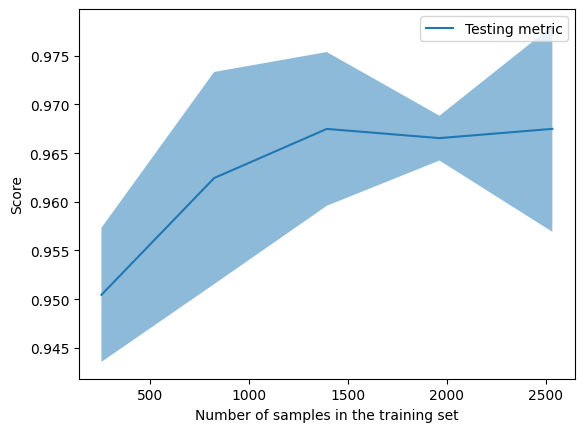

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X = voices.drop(['label'],axis=1)
y = voices['label']
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   DecisionTreeClassifier(), X, y, cv=5)

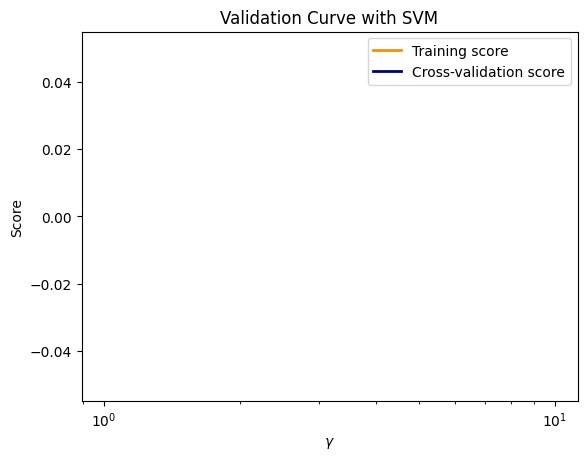

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X = voices.drop(['label'],axis=1)
y = voices['label']
subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

param_range = np.logspace(-1, 0, 1000)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
#plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

ValueError: ignored

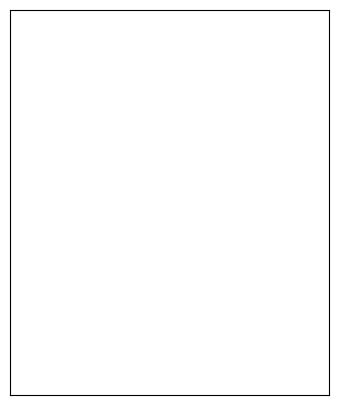

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = voices.drop(['label'],axis=1)
y = voices['label']

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X, y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()